In [1]:
# import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### 1 Reading & Understanding the Data

In [2]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_sharing.shape

(730, 16)

In [4]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### From the above info of dataset, we can clearly see that there is no null value present  and all the three datatypes are present here 

In [6]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### we can infer from above data-
- max temp is 35.32, min temp is 2.42
- max, mid and min values of casual, registered and cnt, etc
- max weathersit is 3, 4th is not there

#### Cleaning the Data

In [7]:
# let us drop the unwanted columns from data but first check all the columns first

bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# instant has only index for the row, dteday has date which can be shown by year and month column
bike_sharing.drop(['instant', 'dteday'], axis=1, inplace=True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#casual and registered are together calculated in the cnt column, lets drop these two also.

bike_sharing.drop(['casual', 'registered'], axis=1, inplace=True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Renaming the Column entries by replacing with their names

In [10]:
# Encoding/mapping the season column
bike_sharing.season = bike_sharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Encoding/mapping the month column
bike_sharing.mnth = bike_sharing.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11: 'nov', 12:'dec'})
        
# Encoding/mapping the weekday column
bike_sharing.weekday = bike_sharing.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
                         
# Encoding/mapping the weathersit column
bike_sharing.weathersit = bike_sharing.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### 2. Visualising the Data

#### Numerical Analysis

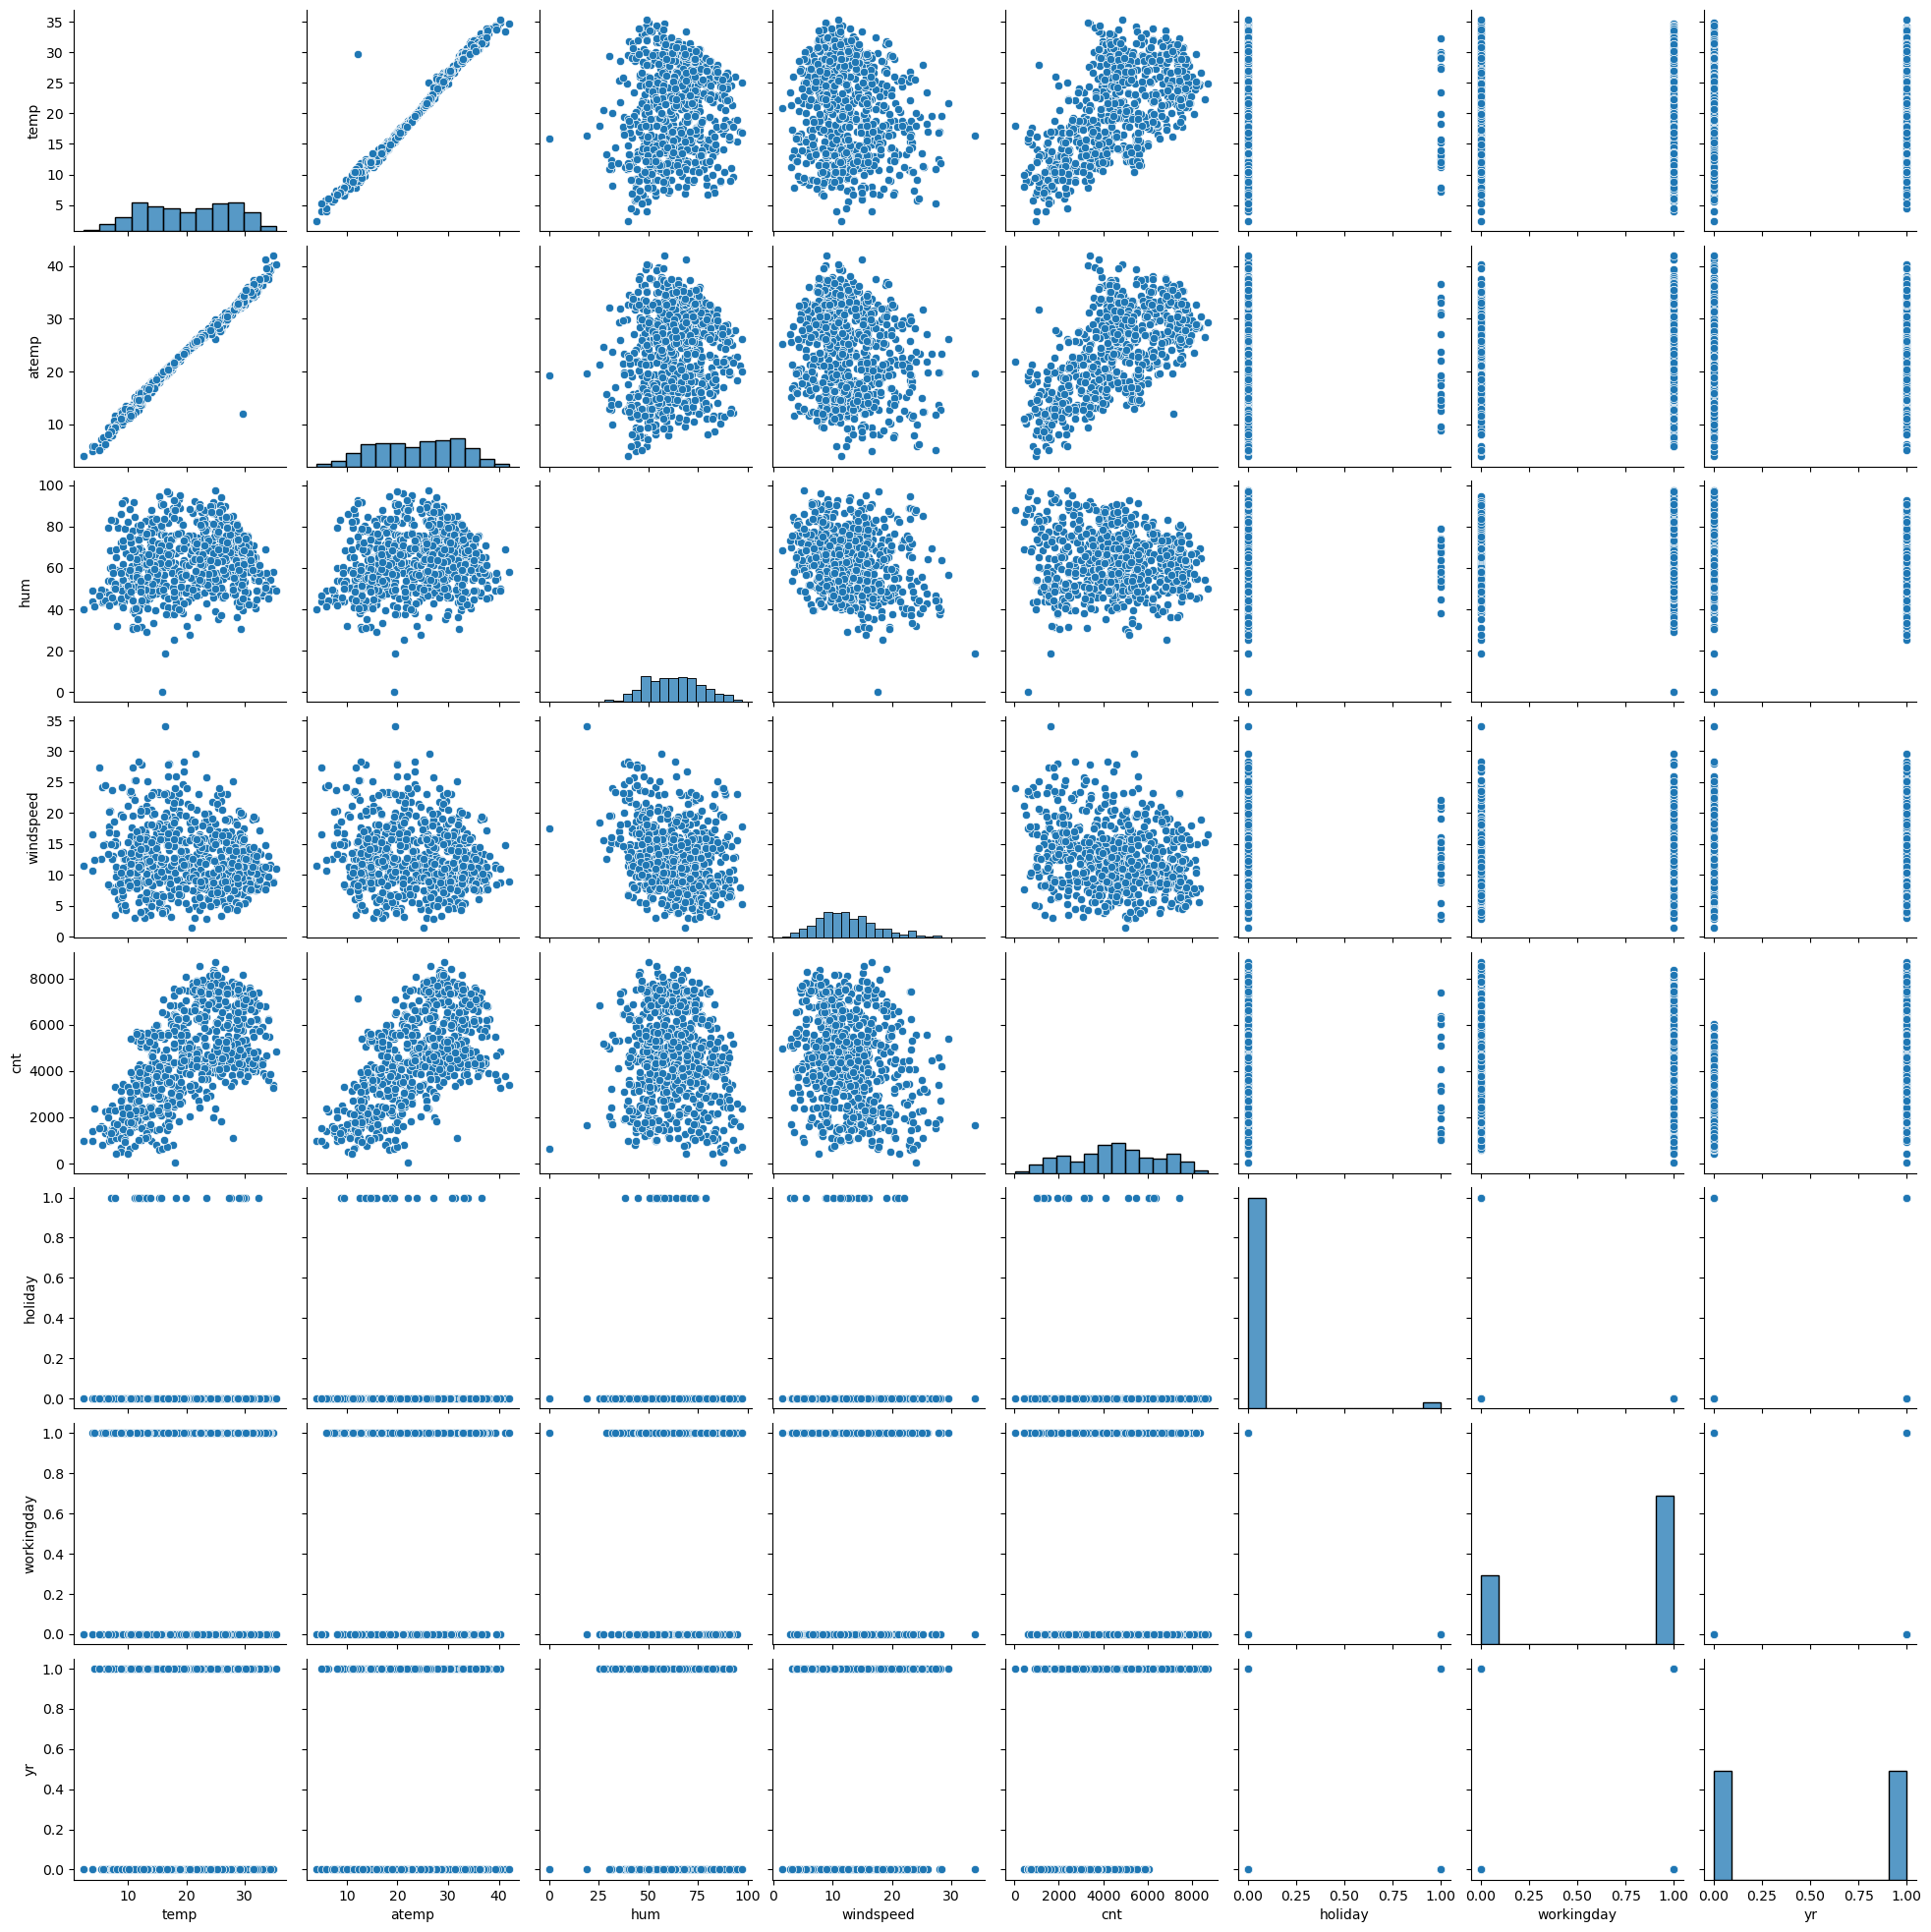

In [12]:
#lets compare all the numeric variable columns with each other

sns.pairplot(data=bike_sharing, vars=['temp','atemp','hum','windspeed','cnt', 'holiday', 'workingday', 'yr'])
plt.show()

#### from above comparison plots, we can see the following results-
-  more rides are taken in holidays
- there is no much effect of windspeed on cnt
- temp and atemp are also positively correlated with cnt
- temp and atemp are also strongly positively corr but there is no such significance of this relation bcz of multicollinearity

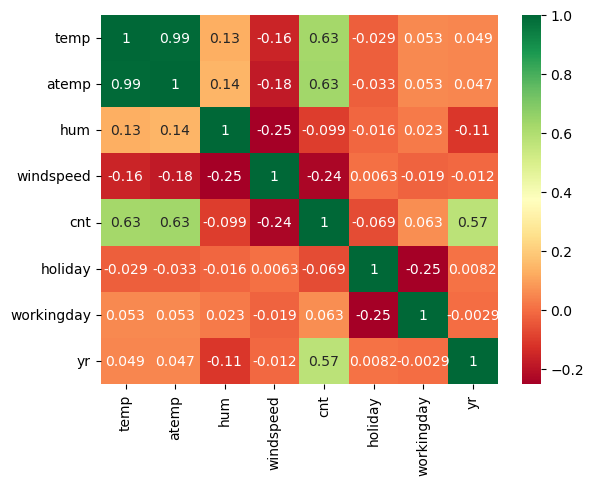

In [13]:
# lets check correlation between numerical variables also to verify above inferences

sns.heatmap(bike_sharing[['temp','atemp','hum','windspeed','cnt', 'holiday', 'workingday', 'yr']].corr(), annot = True, cmap="RdYlGn")
plt.show()

#### Here wecan clearly see what we inferred above
- cnt is positively correlated with temperature and alittle with workingday
- cnt is also having good positive relation with year
- temp is related positively with hum
- windspeed is not having good relation with any of the variables

In [14]:
# In above corr matrix we see temp and atemp are highly corr with 99% and hence temp can be dropped
bike_sharing.drop(['temp'], axis=1, inplace=True)
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Categorical Analysis

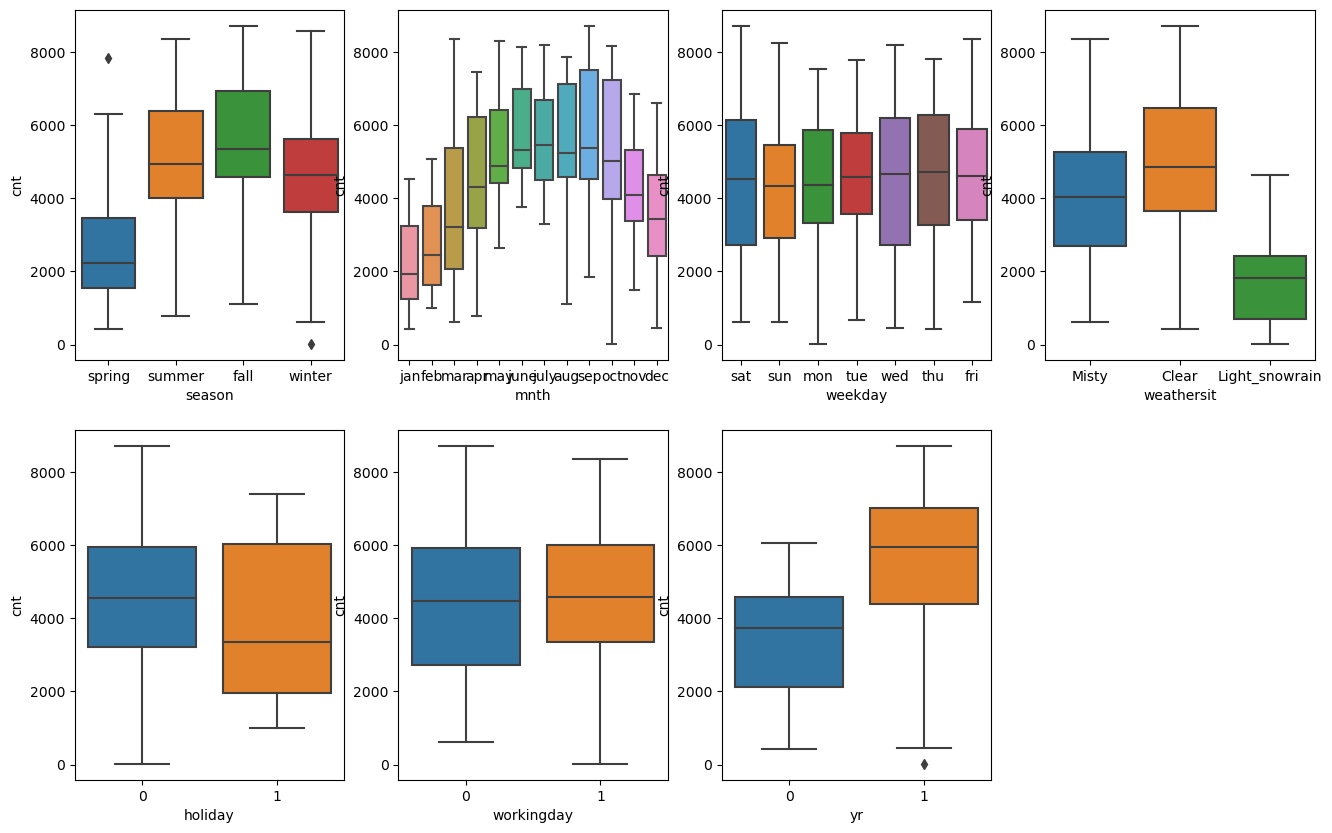

In [15]:
#lets visualise categorical variable data

plt.figure(figsize= (16, 10))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bike_sharing)

plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=bike_sharing)

plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=bike_sharing)

plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=bike_sharing)

plt.subplot(2, 4, 5)
sns.boxplot(x='holiday', y='cnt', data=bike_sharing)

plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bike_sharing)

plt.subplot(2, 4, 7)
sns.boxplot(x='yr', y='cnt', data=bike_sharing)
plt.show()

#### from above box plots, we can conclude the following for cnt:-
- cnt is max seen in fall season and min in winter
- also we can say, rides is max in september and min in january
- there is not much difference in weekdays with cnt(rides)
- cnt is max in clear weather and min in light_snowrain
- total rides taken are more in holidays, although max values of holiday or non holiday are same
- lastly, more rides taken are in the year 2019 as copm to 2018,it means as year increases, people get more aware and usage increses

#### Lets compare categorical data yearwise for each category in bar plot

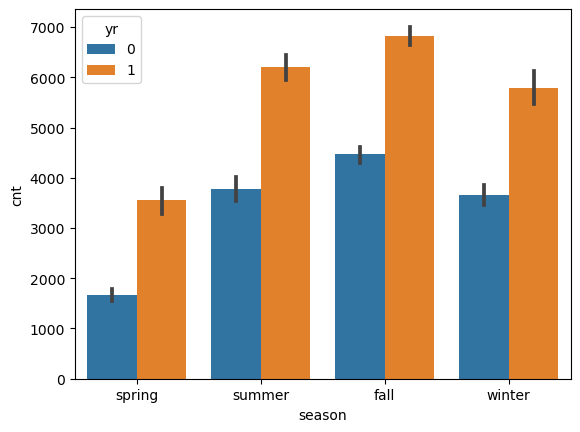

In [17]:
sns.barplot(data= bike_sharing, x='season', y='cnt', hue='yr')
plt.show()

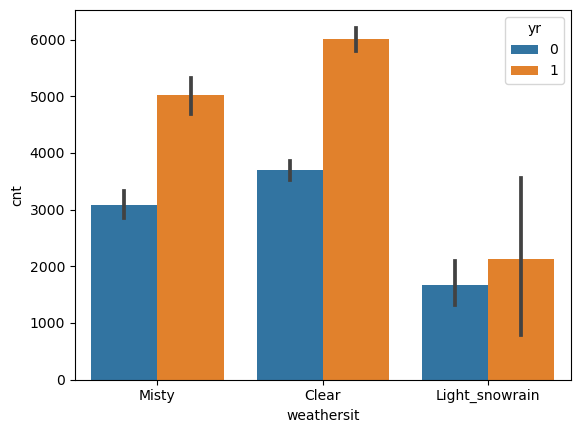

In [18]:
sns.barplot(data= bike_sharing, x='weathersit', y='cnt', hue='yr')
plt.show()

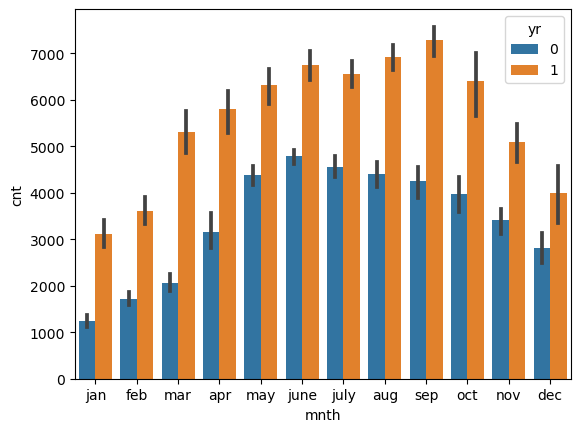

In [19]:
sns.barplot(data= bike_sharing, x='mnth', y='cnt', hue='yr')
plt.show()

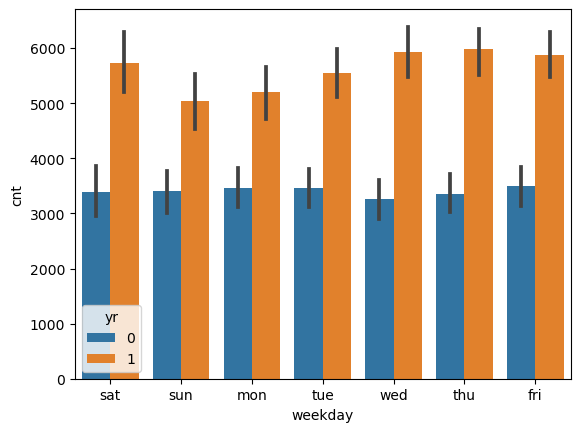

In [21]:
sns.barplot(data= bike_sharing, x='weekday', y='cnt', hue='yr')
plt.show()

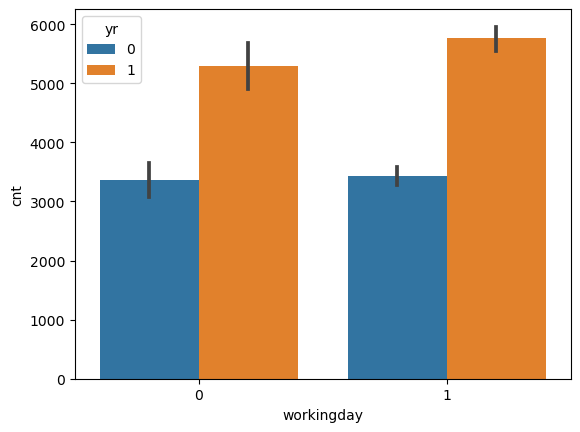

In [22]:
sns.barplot(data= bike_sharing, x='workingday', y='cnt', hue='yr')
plt.show()

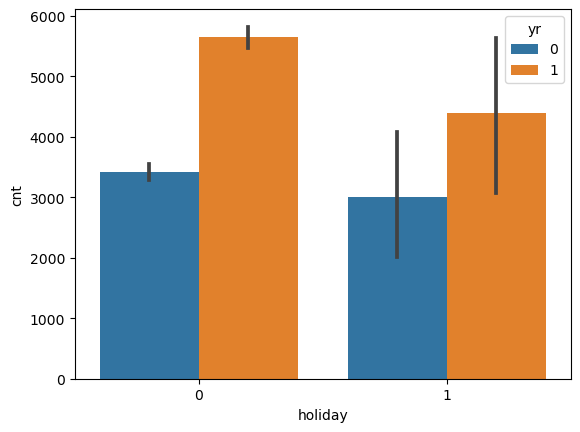

In [23]:
sns.barplot(data= bike_sharing, x='holiday', y='cnt', hue='yr')
plt.show()

### 3. Preparing the Data for Modelling

In [25]:
# creating Dummy variables for month, weekday, weathersit and season variables.

months_bike_sharing = pd.get_dummies(bike_sharing.mnth,drop_first=True)
weekdays_bike_sharing = pd.get_dummies(bike_sharing.weekday,drop_first=True)
weathersit_bike_sharing = pd.get_dummies(bike_sharing.weathersit,drop_first=True)
seasons_bike_sharing = pd.get_dummies(bike_sharing.season,drop_first=True)

In [26]:
#lets add/concatenate these dummy variables to the new dataset

bike_sharing_new = pd.concat([bike_sharing, months_bike_sharing, weekdays_bike_sharing, weathersit_bike_sharing, 
                              seasons_bike_sharing], axis=1)
bike_sharing_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,18.18125,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,17.68695,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [27]:
#lets recheck the new dataset to check number of columns, dtype 
bike_sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   atemp           730 non-null    float64
 8   hum             730 non-null    float64
 9   windspeed       730 non-null    float64
 10  cnt             730 non-null    int64  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

In [28]:
# now lets drop the original columns from which we have created new dummy variable columns
bike_sharing_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike_sharing_new

,yr,holiday,workingday,atemp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,11.33210,65.2917,23.458911,2114,0,1,0,...,0,0,1,0,0,0,1,1,0,0
726,1,0,1,12.75230,59.0000,10.416557,3095,0,1,0,...,0,0,0,0,0,0,1,1,0,0
727,1,0,0,12.12000,75.2917,8.333661,1341,0,1,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,11.58500,48.3333,23.500518,1796,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [29]:
bike_sharing_new.shape

(730, 29)

In [30]:
bike_sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   atemp           730 non-null    float64
 4   hum             730 non-null    float64
 5   windspeed       730 non-null    float64
 6   cnt             730 non-null    int64  
 7   aug             730 non-null    uint8  
 8   dec             730 non-null    uint8  
 9   feb             730 non-null    uint8  
 10  jan             730 non-null    uint8  
 11  july            730 non-null    uint8  
 12  june            730 non-null    uint8  
 13  mar             730 non-null    uint8  
 14  may             730 non-null    uint8  
 15  nov             730 non-null    uint8  
 16  oct             730 non-null    uint8  
 17  sep             730 non-null    uin

#### Now our data is fully prepared for further process and all dtypes are numeric.

### 4. Splitting Data into Train-Test Split Sets

In [31]:
df_train, df_test = train_test_split(bike_sharing_new, train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


#### Rescaling the features

In [32]:
#normalization using minmax scaler

from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

#create a list of numeric variables
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars =  ['atemp', 'hum', 'windspeed', 'cnt']

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [33]:
df_train[num_vars].describe()

,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.512989,0.650369,0.320768,0.513620
std,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420
50%,0.526811,0.653714,0.296763,0.518638
75%,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


#### We can clearly see from the graph that max & min values of variables are as expected set to 1 & 0 respectively

#### Training the Model

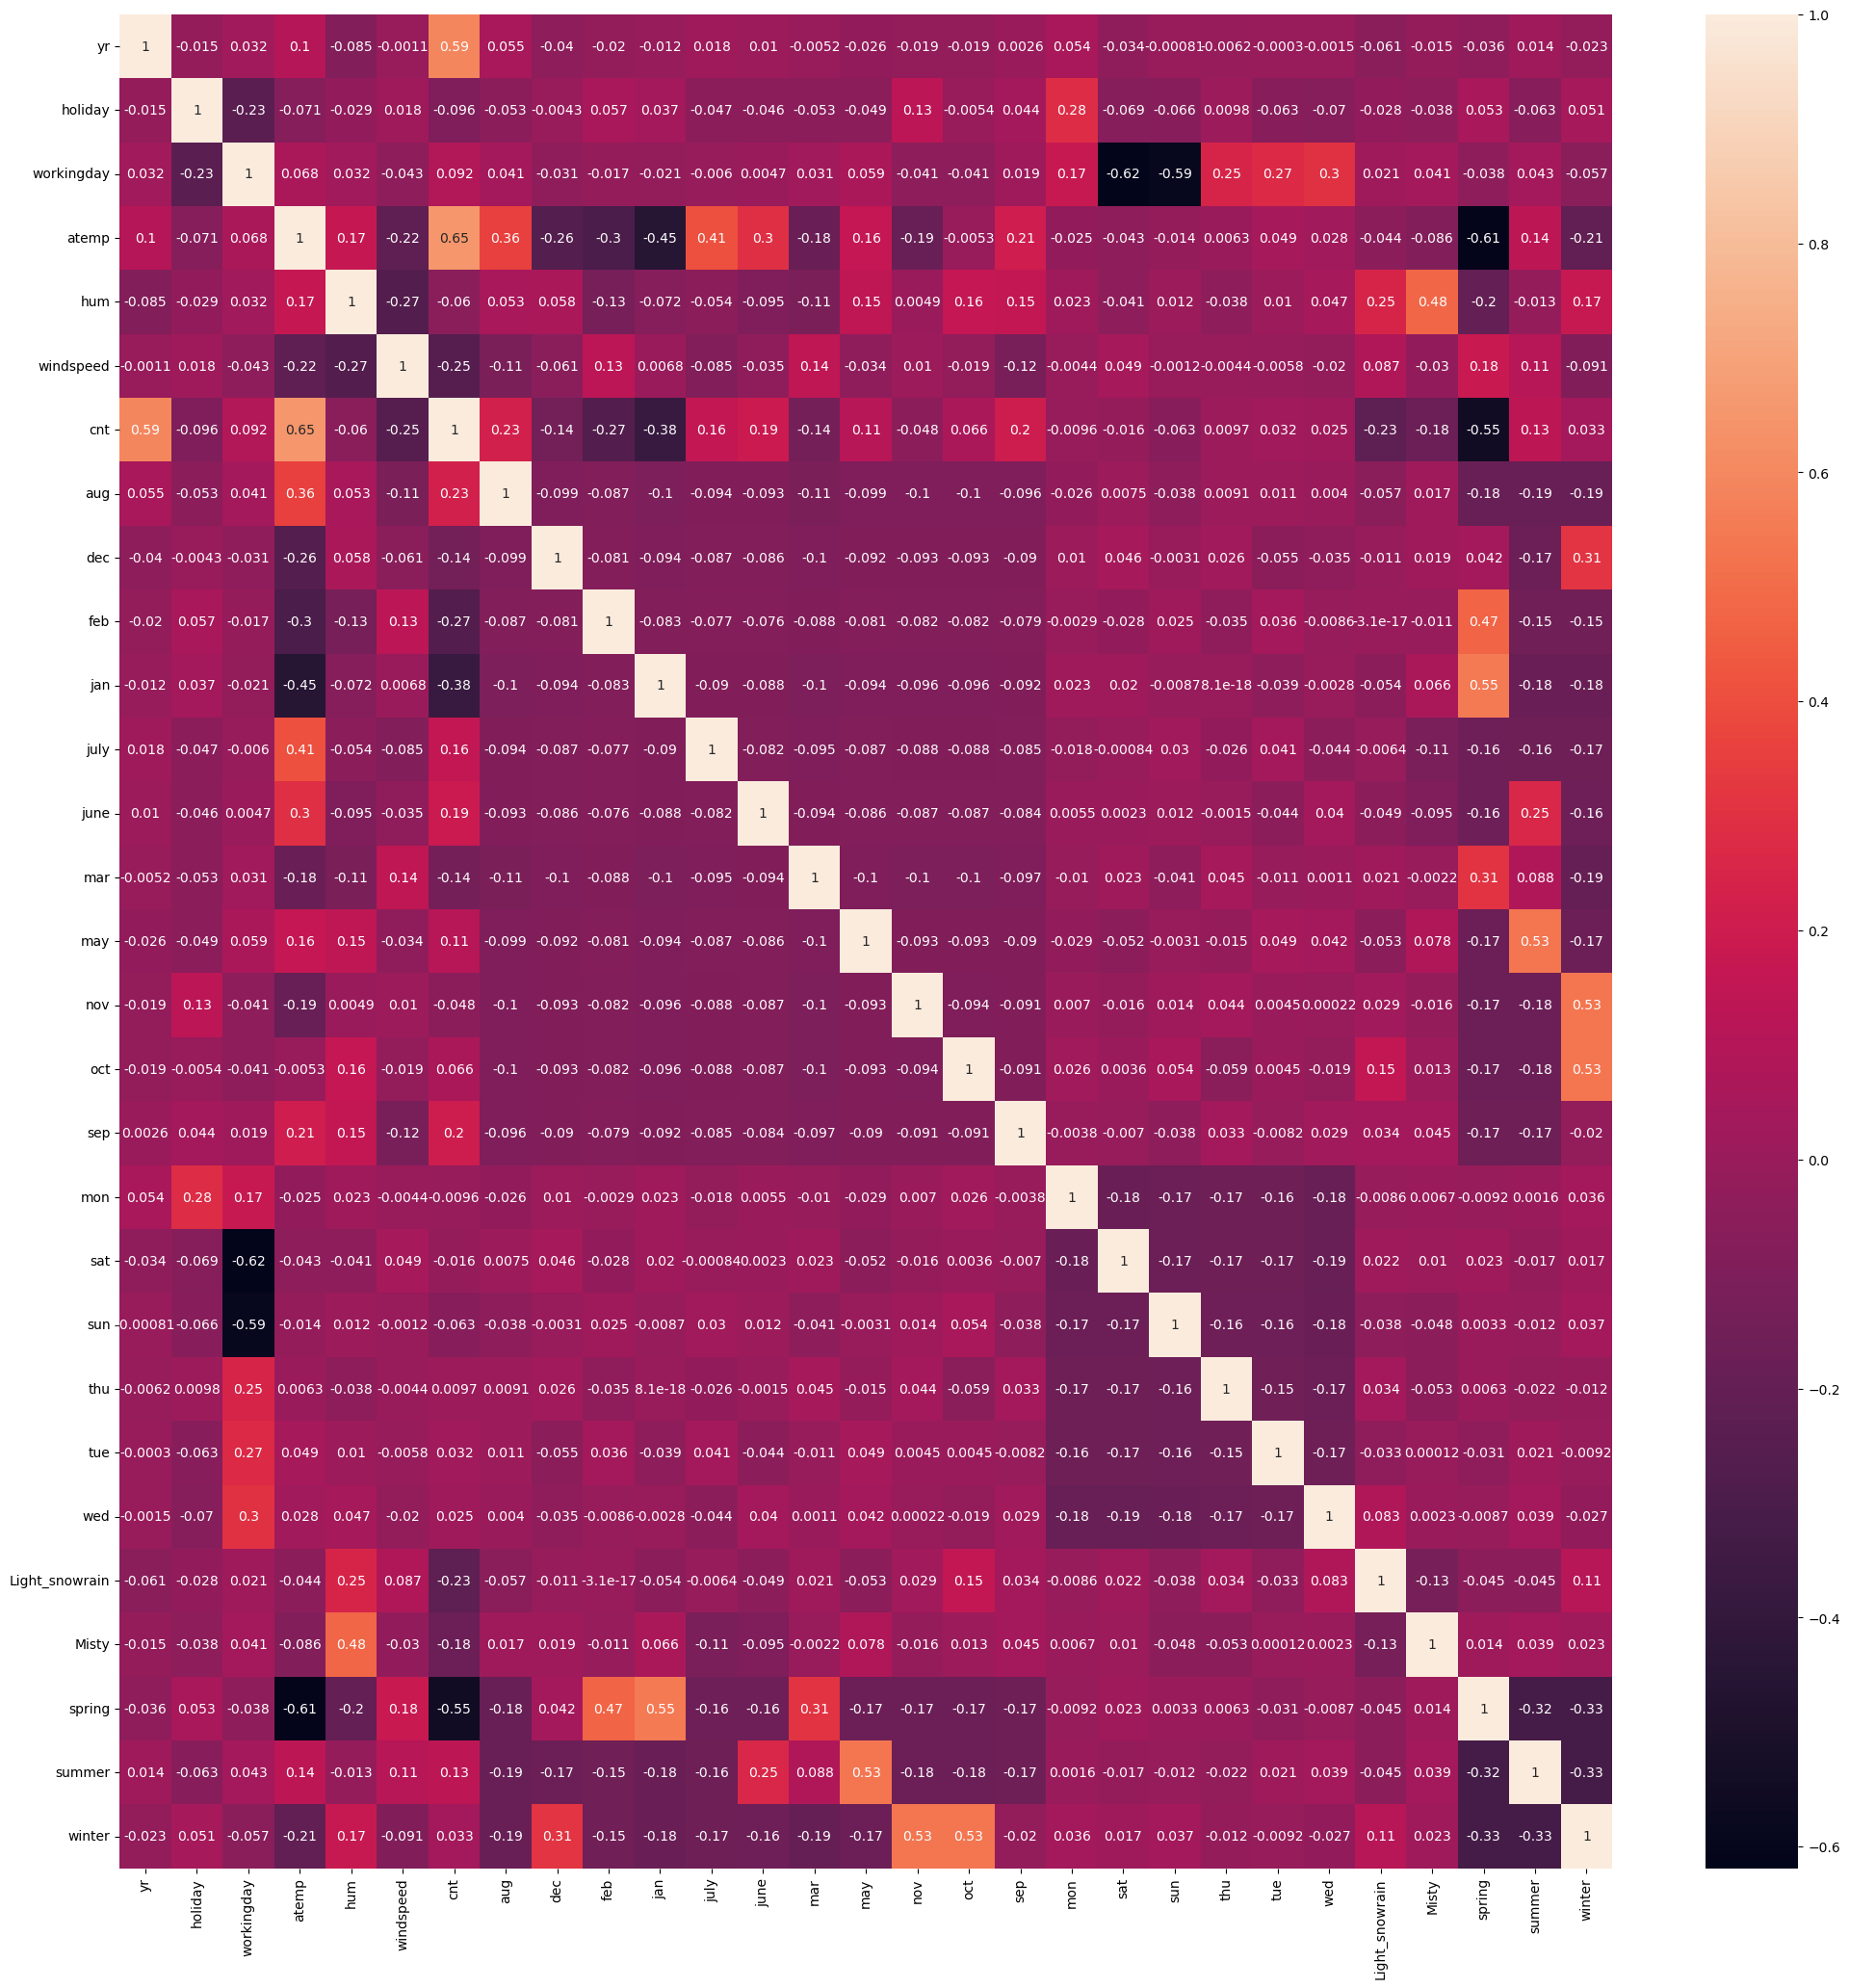

In [34]:
#lets draw the heatmap to find the correlation between vars so that we can drop columns which are not useful 

plt.figure(figsize= (25, 25))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

#### From the above heatmap, we can infer the following:-
- cnt is positively strongly related with temperature
- misty and humidity also have good correlation
- Spring season with Jan and Feb month are in good correlation
- Summer season with may month show good correlation 
- Winter season with oct and nov month show good correlation.

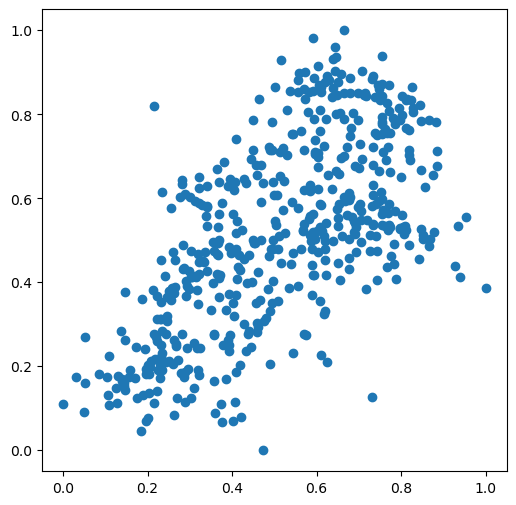

In [35]:
# Visualizing one of the correlation to see the trends via Scatter plot. As cnt is considered to be positively corr with temp
#cnt is our target variable, lets check its linearity via graph

plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

#### Above scatter plot is showing approximate linear relation

In [36]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [37]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain',
       'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [38]:
X_train = df_train

In [39]:
y_train = df_train.pop('cnt')

In [40]:
# next step is to check statistical significance of the variable
# if variables are correlated, then calculate VIF(Variance Inflation Factor)

### 5. Building the Linear Model

In [41]:
#building model by considering all the variables

X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'aug',
       'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain', 'Misty',
       'spring', 'summer', 'winter'],
      dtype='object')

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   atemp           510 non-null    float64
 4   hum             510 non-null    float64
 5   windspeed       510 non-null    float64
 6   aug             510 non-null    uint8  
 7   dec             510 non-null    uint8  
 8   feb             510 non-null    uint8  
 9   jan             510 non-null    uint8  
 10  july            510 non-null    uint8  
 11  june            510 non-null    uint8  
 12  mar             510 non-null    uint8  
 13  may             510 non-null    uint8  
 14  nov             510 non-null    uint8  
 15  oct             510 non-null    uint8  
 16  sep             510 non-null    uint8  
 17  mon             510 non-null    ui

#### Model building using RFE

In [43]:
# lets build our model using recursive frequency elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Recursive feature elimination 

# Create the Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Create the RFE object without specifying the number of features initially
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE to your data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [44]:
#List of variables selected in top 20 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', True, 1),
 ('feb', False, 3),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 8),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 4),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1)]

In [45]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'dec', 'jan', 'july',
       'nov', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'winter'],
      dtype='object')


In [46]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon', 'sun',
       'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [47]:
X_train_rfe = X_train[col]
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   atemp           510 non-null    float64
 3   hum             510 non-null    float64
 4   windspeed       510 non-null    float64
 5   dec             510 non-null    uint8  
 6   jan             510 non-null    uint8  
 7   july            510 non-null    uint8  
 8   nov             510 non-null    uint8  
 9   sep             510 non-null    uint8  
 10  sat             510 non-null    uint8  
 11  Light_snowrain  510 non-null    uint8  
 12  Misty           510 non-null    uint8  
 13  spring          510 non-null    uint8  
 14  winter          510 non-null    uint8  
dtypes: float64(3), int64(2), uint8(10)
memory usage: 28.9 KB


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.88
4,windspeed,4.03
14,winter,2.93
13,spring,2.89
12,Misty,2.26
0,yr,2.06
8,nov,1.82
6,jan,1.75
5,dec,1.54


#### In the above list, humidity has highest VIF = 25.08 and hence can be dropped in building model

### 6. BUILDING LINEAR REGRESSION MODEL

#### Building our first LR model

In [49]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          9.67e-187
Time:                        01:23:13   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3662      0.032     11.

In [50]:
# As we see in above VIF list, humidity shows highest VIF values hence we can drop it
X_train_rfe.drop(['hum'], axis=1, inplace=True)
X_train_new = X_train_rfe.copy()

In [51]:
#calculate vif for new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.61
3,windspeed,3.98
13,winter,2.55
12,spring,2.36
0,yr,2.06
7,nov,1.80
5,jan,1.65
11,Misty,1.53
4,dec,1.46
6,july,1.35


#### Now, by dropping one variable, we can see our VIF values are changed and seems to be better, still we can drop few more variables from p-values

#### Building 2nd LR model

In [52]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.7
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.10e-184
Time:                        01:23:31   Log-Likelihood:                 501.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     495   BIC:                            -908.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2902      0.026     11.288      0.000       0.240       0.341
yr                 0.2362      0.008     28.711      0.000       0.220       0.252
holiday           -0.0847      0.026     -3.222      0.001      -0.136      -0.033
atemp              0.4125      0.034     12.073      0.000       0.345       0.480
windspeed         -0.1441      0.026     -5.636      0.000      -0.194      -0.094
dec               -0.0541      0.018     -3.083      0.002      -0.089      -0.020
jan               -0.0568      0.018     -3.090      0.002      -0.093      -0.021
july              -0.0603      0.017     -3.471      0.001      -0.094      -0.026
nov               -0.0497      0.019     -2.624      0.009      -0.087      -0.012
sep                0.0553      0.016      3.501      0.001       0.024       0.086
sat                0.0205      0.011      1.814      0.070      -0.002       0.043
Light_snowrain    -0.2917      0.025    -11.756      0.000      -0.340      -0.243
Misty             -0.0819      0.009     -9.329      0.000      -0.099      -0.065
spring            -0.1096      0.016     -7.050      0.000      -0.140      -0.079
winter             0.0577      0.014      4.095      0.000       0.030       0.085
==============================================================================
Omnibus:                       77.462   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.699
Skew:                          -0.762   Prob(JB):                     2.62e-44
Kurtosis:                       5.669   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#again we can see one more variable saturday have high p-value, so we can drop it also

In [53]:
# As we see in above model, saturday seems to have high p-value hence we can drop it
X_train_rfe.drop(['sat'], axis=1, inplace=True)
X_train_new = X_train_rfe.copy()

In [54]:
#calculate vif for new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
12,winter,2.55
11,spring,2.35
0,yr,2.06
7,nov,1.80
5,jan,1.65
10,Misty,1.53
4,dec,1.46
6,july,1.35


#### Now, our data looks good and we can go for building a new model

#### Building 3rd LR Model

In [55]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          3.95e-185
Time:                        01:25:51   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2931      0.026     11.396      0.000       0.243       0.344
yr                 0.2357      0.008     28.604      0.000       0.220       0.252
holiday           -0.0881      0.026     -3.349      0.001      -0.140      -0.036
atemp              0.4117      0.034     12.022      0.000       0.344       0.479
windspeed         -0.1418      0.026     -5.540      0.000      -0.192      -0.092
dec               -0.0531      0.018     -3.020      0.003      -0.088      -0.019
jan               -0.0562      0.018     -3.053      0.002      -0.092      -0.020
july              -0.0598      0.017     -3.432      0.001      -0.094      -0.026
nov               -0.0501      0.019     -2.640      0.009      -0.087      -0.013
sep                0.0557      0.016      3.514      0.000       0.025       0.087
Light_snowrain    -0.2912      0.025    -11.708      0.000      -0.340      -0.242
Misty             -0.0817      0.009     -9.296      0.000      -0.099      -0.064
spring            -0.1096      0.016     -7.036      0.000      -0.140      -0.079
winter             0.0580      0.014      4.110      0.000       0.030       0.086
==============================================================================
Omnibus:                       71.564   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.324
Skew:                          -0.692   Prob(JB):                     1.05e-42
Kurtosis:                       5.680   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# As we see in above model, it looks prettygood, still we can drop november due to high p- value hence we get
X_train_rfe.drop(['nov'], axis=1, inplace=True)
X_train_new = X_train_rfe.copy()

In [57]:
#calculate vif for new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.54
3,windspeed,3.91
10,spring,2.35
0,yr,2.06
5,jan,1.64
11,winter,1.64
9,Misty,1.53
6,july,1.35
4,dec,1.29
7,sep,1.20


#### Building 4th LR Model

In [58]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.6
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          8.41e-185
Time:                        01:27:44   Log-Likelihood:                 495.96
No. Observations:                 510   AIC:                            -965.9
Df Residuals:                     497   BIC:                            -910.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2803      0.025     11.031      0.000       0.230       0.330
yr                 0.2357      0.008     28.432      0.000       0.219       0.252
holiday           -0.0963      0.026     -3.664      0.000      -0.148      -0.045
atemp              0.4304      0.034     12.766      0.000       0.364       0.497
windspeed         -0.1414      0.026     -5.490      0.000      -0.192      -0.091
dec               -0.0357      0.016     -2.177      0.030      -0.068      -0.003
jan               -0.0510      0.018     -2.768      0.006      -0.087      -0.015
july              -0.0625      0.017     -3.572      0.000      -0.097      -0.028
sep                0.0597      0.016      3.763      0.000       0.029       0.091
Light_snowrain    -0.2864      0.025    -11.478      0.000      -0.335      -0.237
Misty             -0.0808      0.009     -9.140      0.000      -0.098      -0.063
spring            -0.1060      0.016     -6.792      0.000      -0.137      -0.075
winter             0.0406      0.013      3.234      0.001       0.016       0.065
==============================================================================
Omnibus:                       63.315   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.929
Skew:                          -0.636   Prob(JB):                     3.08e-35
Kurtosis:                       5.421   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  We can see  that the above model  looks good, as :-
- there seems to be very low Multicollinearity between the predictors and the p-values for all the predictors seems to be significant., i.e 0.
- f(statistics) is also greater than 1
-  Also, r2 and adjusted r2 values are quite considerable
- For now, we will consider this lr_4 as our final model (unless the Test data metrics are not significantly close to this number).


In [60]:
lr_4.params

const             0.280255
yr                0.235715
holiday          -0.096266
atemp             0.430362
windspeed        -0.141401
dec              -0.035706
jan              -0.050976
july             -0.062460
sep               0.059709
Light_snowrain   -0.286424
Misty            -0.080788
spring           -0.106031
winter            0.040593
dtype: float64

### 7. Residual Analysis of the train data and validation

In [61]:
X_train_lm_4

,const,yr,holiday,atemp,windspeed,dec,jan,july,sep,Light_snowrain,Misty,spring,winter
653,1.0,1,0,0.501133,0.300794,0,0,0,0,0,0,0,1
576,1.0,1,0,0.766351,0.264686,0,0,1,0,0,0,0,0
426,1.0,1,0,0.438975,0.255342,0,0,0,0,0,1,1,0
728,1.0,1,0,0.200348,0.663106,1,0,0,0,0,0,1,0
482,1.0,1,0,0.391735,0.188475,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.762183,0.355596,0,0,0,0,0,1,0,0
578,1.0,1,0,0.824359,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,0,0.218747,0.111379,0,0,0,0,0,0,1,0
350,1.0,0,0,0.223544,0.431816,1,0,0,0,0,1,0,1


#### Normality of error terms

In [62]:
y_train_pred = lr_4.predict(X_train_lm_4)

Text(0.5, 0, 'Errors')

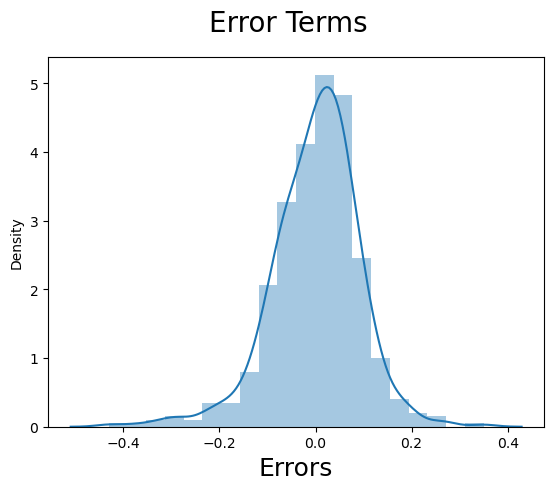

In [63]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot(y_train-y_train_pred, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### In the above plot, we can see that the error terms are normally distributed

#### Multi Colinearity

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.54
3,windspeed,3.91
10,spring,2.35
0,yr,2.06
5,jan,1.64
11,winter,1.64
9,Misty,1.53
6,july,1.35
4,dec,1.29
7,sep,1.20


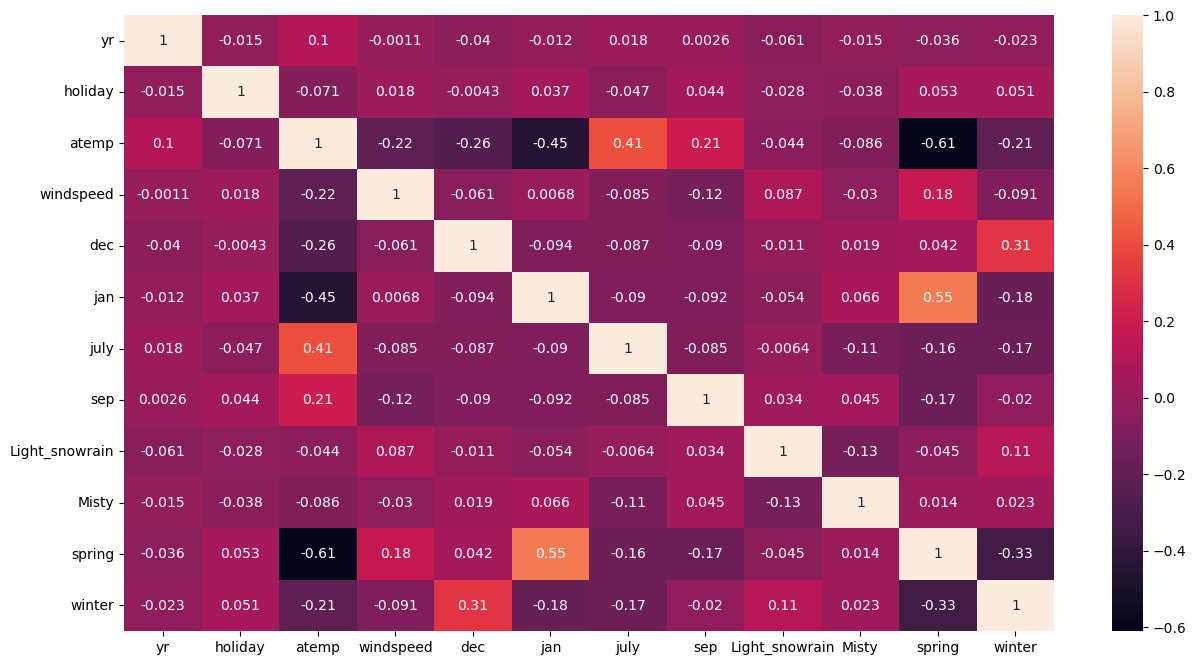

In [65]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

#### All the VIF values are less than 5 and no multicollinearity is seen in the heatmap, which is good model

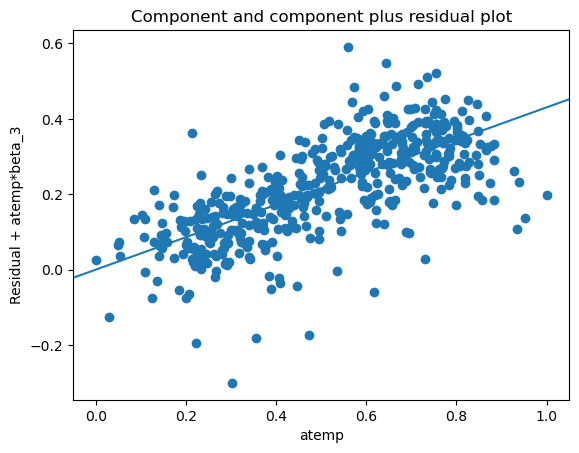

In [66]:
# Linear relationship validation using CCPR plot

sm.graphics.plot_ccpr(lr_4, 'atemp')
plt.show()

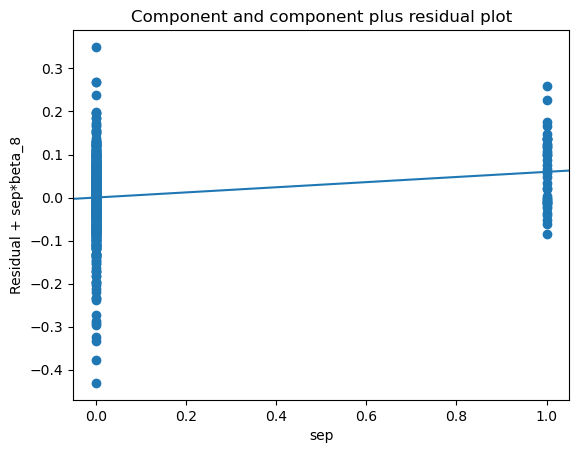

In [68]:
sm.graphics.plot_ccpr(lr_4, 'sep')
plt.show()

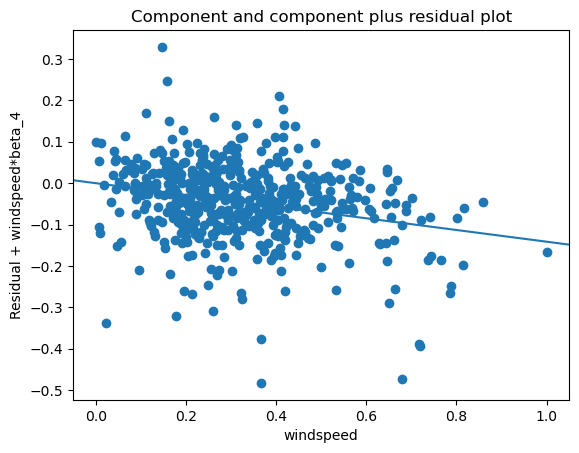

In [69]:
sm.graphics.plot_ccpr(lr_4, 'windspeed')
plt.show()

#### All the above plots are showing linear relationship

#### Homoscedasticity

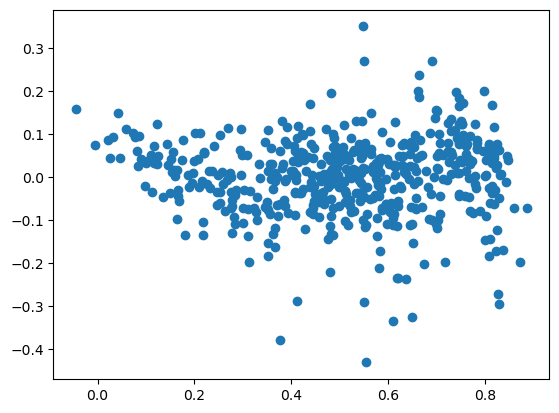

In [74]:
y_train_pred = lr_4.predict(X_train_lm_4)
residuals = y_train - y_train_pred
plt.scatter(y_train_pred, residuals)


In [75]:
# No fixed pattern can be seen in the above scatter plot, which is one of the feature of model to be homoscedasticity

### 8. Predictions and Evaluation on Test Set

In [79]:
#create a list of num vars
num_vars =  ['atemp', 'hum', 'windspeed', 'cnt']

# Fit on data
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.778767,0.534223,0.149393,0.704300,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.855132,0.470417,0.231142,0.725421,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.492359,0.777843,0.443398,0.278853,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.805661,0.236659,0.449707,0.545512,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.749249,0.070765,0.682387,0.569148,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [80]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.530942,0.508750,0.418870,0.516216,0.059361,0.086758,0.100457,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.228159,0.201253,0.188111,0.238702,0.236840,0.282125,0.301297,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.720622,0.651165,0.524362,0.682487,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### here the min and max values of scaler are seems 0 & 1 respectively same as we did in train set

In [81]:
y_test = df_test.pop('cnt')
X_test = df_test

In [82]:
#add a constant

X_test = X_test[X_train_new.columns]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [83]:
y_test_pred = lr_4.predict(X_test_lm_4)

In [84]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.7995

### Step 9: Model Evaluation

In [85]:
# Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_test_pred')

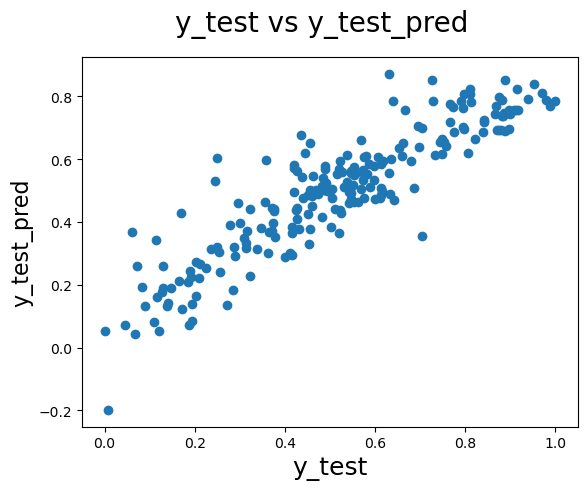

In [86]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

In [87]:
round(lr_4.params,5)

const             0.28025
yr                0.23572
holiday          -0.09627
atemp             0.43036
windspeed        -0.14140
dec              -0.03571
jan              -0.05098
july             -0.06246
sep               0.05971
Light_snowrain   -0.28642
Misty            -0.08079
spring           -0.10603
winter            0.04059
dtype: float64

In [88]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7878


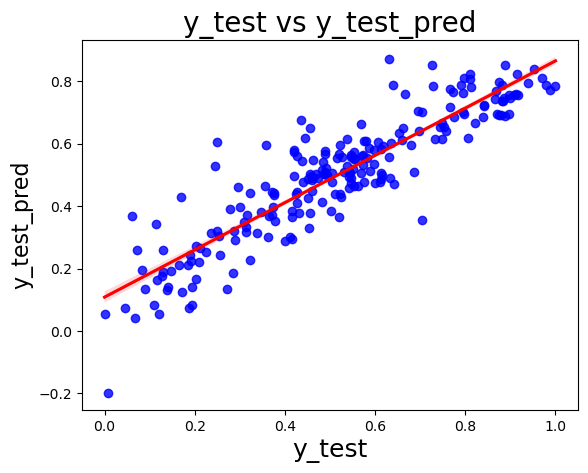

In [89]:
# Visualizing the fit on the test data by plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

### Step 10. Comparision between Training and Testing dataset

- Train dataset R^2          : 0.834
- Test dataset R^2           : 0.799
- Train dataset Adjusted R^2 : 0.830   
- Test dataset Adjusted R^2  : 0.787


### SUMMARY

#### We can conclude from LR Model:-

- Our Train-Test dataset have almost similar values of r2 and adj r2, hence our predictions are correct and we can consider this model as final model.
- Also, demand for bike rides depends on - atemp, september month, holiday, year, windspeed, light_snowrain, winter, spring, misty,